In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import pycountry
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [69]:
df= pd.read_csv(r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows.csv2nd_prep_data.csv")

In [70]:
path = r"C:\Users\danie\Desktop\Dan\Career Foundry\Achievement Six\Netflix Movies and Shows\imdb_movies_shows.csv2nd_prep_data.csv"

In [71]:
df.columns

Index(['Unnamed: 0', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [72]:
df.head()

,Unnamed: 0,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,0,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],1.0,NaN,NaN
1,1,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0
2,2,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0
3,3,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],NaN,8.0,392419.0
4,4,The Exorcist,MOVIE,1973,133,['horror'],['US'],NaN,8.1,391942.0


In [73]:
df.shape

(5558, 10)

Check for missing values

In [74]:
df.isnull().sum()

Unnamed: 0                 0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                 3593
imdb_score               459
imdb_votes               473
dtype: int64

In [75]:
# check the mean
df['imdb_votes'].mean()

24221.498525073745

In [76]:
# check the median
df['imdb_votes'].median()

2471.0

In [77]:
# check the max
df['imdb_votes'].max()

2268288.0

In [78]:
df.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes
count,5558.000000,5558.000000,5558.000000,1965.000000,5099.000000,5.085000e+03
mean,2778.500000,2015.904282,78.424973,2.197455,6.543813,2.422150e+04
std,1604.600729,7.403668,39.566588,2.673452,1.149223,8.857135e+04
min,0.000000,1945.000000,0.000000,1.000000,1.600000,5.000000e+00
25%,1389.250000,2015.000000,45.000000,1.000000,5.800000,5.790000e+02
50%,2778.500000,2018.000000,86.000000,1.000000,6.600000,2.471000e+03
75%,4167.750000,2020.000000,105.000000,2.000000,7.400000,1.077600e+04
max,5557.000000,2022.000000,251.000000,42.000000,9.500000,2.268288e+06


In [79]:
df['seasons'] = df['seasons'].fillna(df['seasons'].median())

In [80]:
df['imdb_votes'] = df['imdb_votes'].fillna(df['seasons'].median())

Data prep for regression analysis

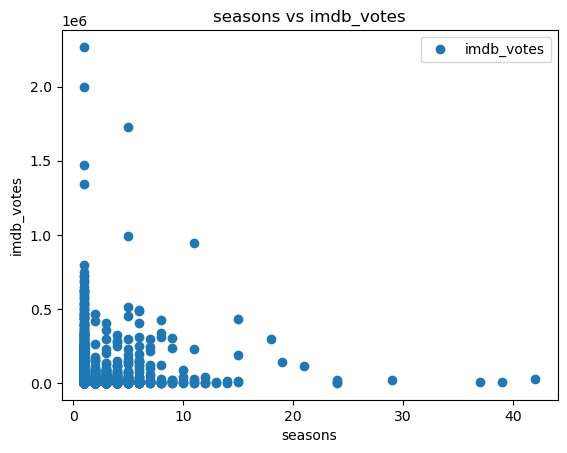

In [81]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'seasons', y='imdb_votes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('seasons vs imdb_votes')  
plt.xlabel('seasons')  
plt.ylabel('imdb_votes')  
plt.show()





In [82]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['seasons'].values.reshape(-1,1)
y = df['imdb_votes'].values.reshape(-1,1)

In [83]:
x

NameError: name 'x' is not defined

In [84]:
y

array([[1.00000e+00],
       [7.95222e+05],
       [5.30877e+05],
       ...,
       [2.60000e+01],
       [3.90000e+01],
       [3.20000e+01]])

In [85]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [87]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [88]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

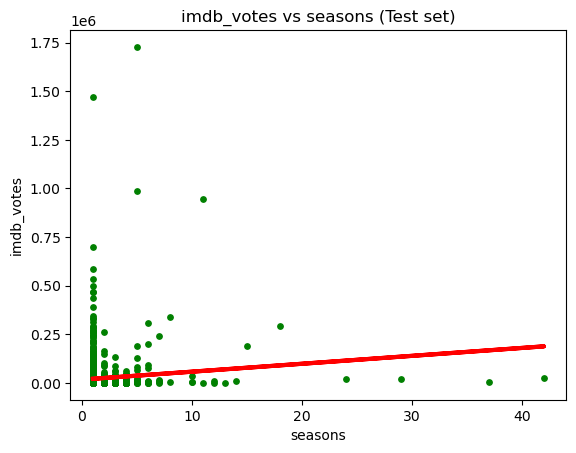

In [89]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('imdb_votes vs seasons (Test set)')
plot_test.xlabel('seasons')
plot_test.ylabel('imdb_votes')
plot_test.show()

In [90]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [91]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4069.74972771]]
Mean squared error:  6976441922.393812
R2 score:  0.00975440634105107


In [92]:
y_predicted

array([[21154.47132022],
       [21154.47132022],
       [78130.96750815],
       ...,
       [21154.47132022],
       [21154.47132022],
       [21154.47132022]])

In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,33579.0,21154.471320
1,7376.0,21154.471320
2,189191.0,78130.967508
3,5514.0,33363.720503
4,660.0,25224.221048
5,399.0,21154.471320
6,1936.0,21154.471320
7,1360.0,21154.471320
8,391.0,21154.471320
9,42373.0,21154.471320


compare how regression fits the training set

In [94]:
# This is predicting X_train!

y_predicted_train = regression.predict(X_train) 

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [96]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4069.74972771]]
Mean squared error:  7257616748.894447
R2 score:  0.005215060936454408


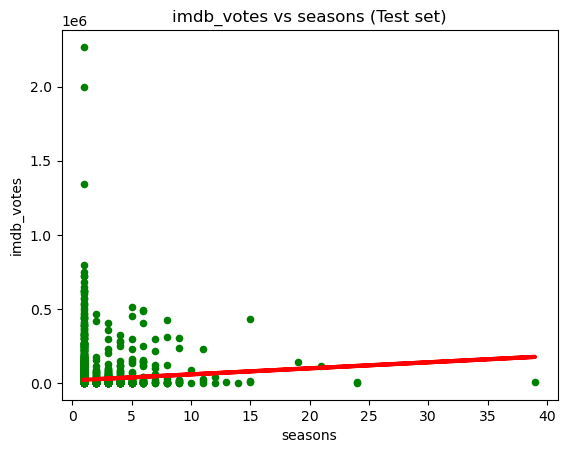

In [97]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 20)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('imdb_votes vs seasons (Test set)')
plot_test.xlabel('seasons')
plot_test.ylabel('imdb_votes')
plot_test.show()

The fewer the seasons the higher the votes. Couple of things to note. Not many TV shows have longer then 10 seasons. There are a couple of outliers such as Wheel of Fortune is on 39 seasons, Survivor 42. There are only 8 shows that have 20 seasons or more.

In [98]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['runtime'].values.reshape(-1,1)
y = df['imdb_votes'].values.reshape(-1,1)

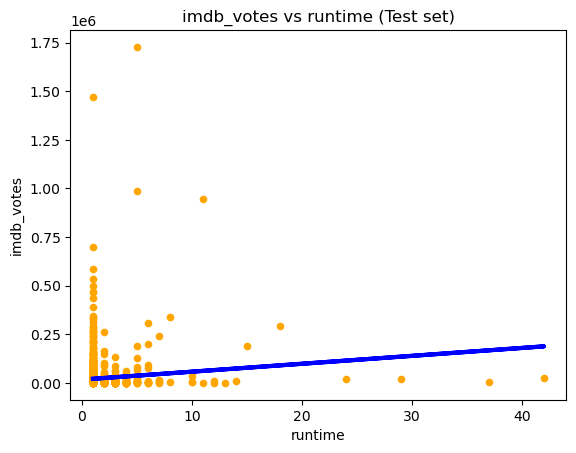

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='orange', s = 20)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('imdb_votes vs runtime (Test set)')
plot_test.xlabel('runtime')
plot_test.ylabel('imdb_votes')
plot_test.show()

The above was a practice to see if there was a different correlation between the sets. 